In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [2]:
df1 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/Nation_HealthSurvey_Variables.csv")

df2 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANHospitals.csv")

df3 = pd.read_csv("/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANpopulation_and_population_density_USA.csv")

df4 = pd.read_csv(r"/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/usaCLEANCDRData.csv")

states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
          "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana",
          "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
          "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", 
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", 
          "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
          "West Virginia", "Wisconsin", "Wyoming", "District of Columbia"]
abb = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", 
       "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
       "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY", "DC"]

for x in range(51):
    df4["Province/State"] = df4["Province/State"].replace(abb[x], states[x])
        
df4 = df4[df4["Last Update"] == "04/01/2020"]
groupData = df4.groupby("Province/State")
df4 = groupData.sum()

df1 = df1.rename(columns = {"State": "Province/State"})
df1 = df1.set_index('Province/State')
df2 = df2.rename(columns={"Location": "Province/State"})
df2 = df2.rename(columns ={"Total": "Total Beds"})
df2 = df2.set_index('Province/State')
df3 = df3.rename(columns = {"State": "Province/State"})
df3 = df3.set_index('Province/State')
df4 = df4.rename(columns = {"Deaths": "COVID Deaths"})
df4 = df4[["COVID Deaths"]]
df4

df = pd.concat([df1,df2], axis=1, sort = False)
df = pd.concat([df, df3], axis = 1, sort = False)
df = pd.concat([df, df4], axis = 1, sort = False)
df = df.drop('Deaths', axis=1)

df.dtypes

Years of Potential Life Lost Rate              float64
Average Number of Physically Unhealthy Days    float64
Average Number of Mentally Unhealthy Days      float64
% Smokers                                        int64
% Adults with Obesity                            int64
Food Environment Index                         float64
% Physically Inactive                            int64
% With Access to Exercise Opportunities        float64
Chlamydia Rate                                 float64
% Uninsured                                    float64
# Primary Care Physicians                      float64
Primary Care Physicians Rate                   float64
Preventable Hospitalization Rate               float64
% Vaccinated                                   float64
High School Graduation Rate                    float64
% Some College                                   int64
% Unemployed                                   float64
% Children in Poverty                          float64
Income Rat

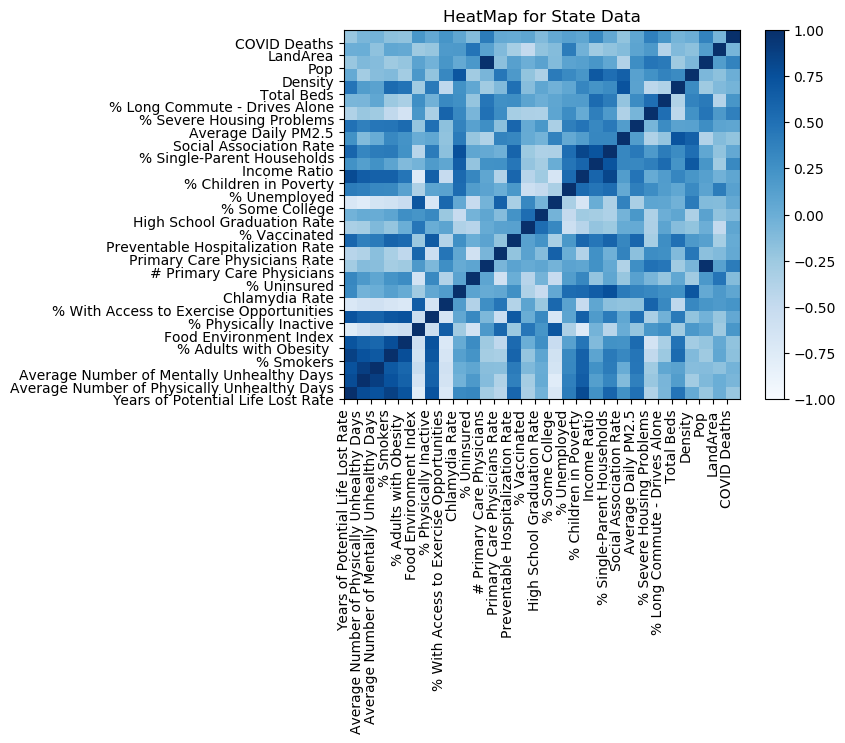

In [3]:
corr_m = df.corr()
plt.style.use('default')
heatmap = plt.pcolor(corr_m, vmin = -1, vmax = 1, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

plt.xticks((np.arange(0, 29, step=1)), ['Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', '# Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'COVID Deaths'], rotation = 90)
plt.yticks((np.arange(0, 29, step=1)), ['Years of Potential Life Lost Rate', 
                                        'Average Number of Physically Unhealthy Days',
                                        'Average Number of Mentally Unhealthy Days',
                                       '% Smokers', '% Adults with Obesity ',
                                       'Food Environment Index','% Physically Inactive',
                                       '% With Access to Exercise Opportunities','Chlamydia Rate', 
                                        '% Uninsured', '# Primary Care Physicians', 
                                       'Primary Care Physicians Rate', 'Preventable Hospitalization Rate', 
                                       '% Vaccinated','High School Graduation Rate','% Some College',
                                       '% Unemployed', '% Children in Poverty', 'Income Ratio',
                                       '% Single-Parent Households', 'Social Association Rate',
                                        'Average Daily PM2.5', '% Severe Housing Problems',
                                        '% Long Commute - Drives Alone','Total Beds','Density','Pop',
                                        'LandArea', 'COVID Deaths'], rotation = 0)

plt.title("HeatMap for State Data")
print()

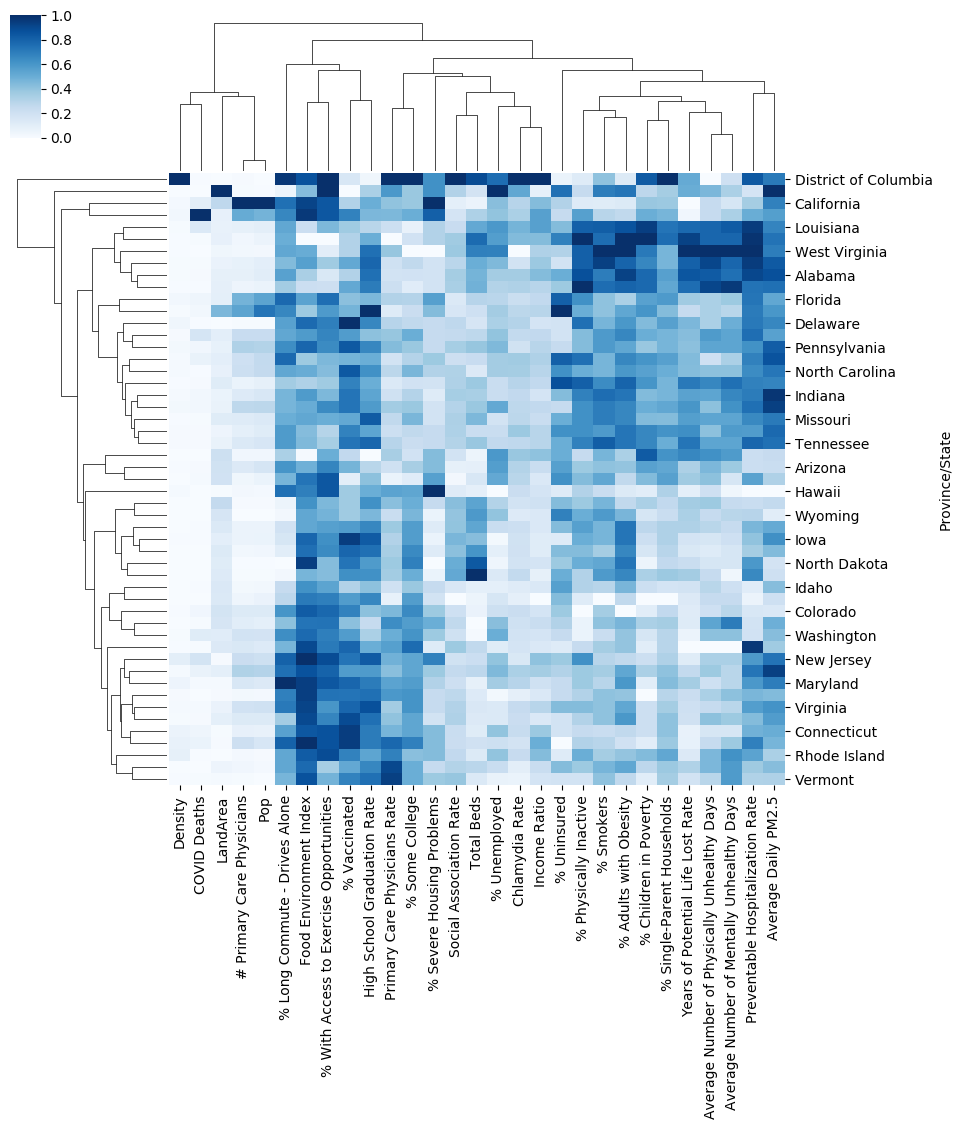

In [12]:
g = sns.clustermap(df, method="average", metric="euclidean", cmap="Blues", standard_scale = 1)

In [13]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 


for i in range(51):
    

df_pca = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
                                     'PC9', 'PC10', 'PC11', 'PC12', 'PC4'])

ValueError: Shape of passed values is (51, 29), indices imply (51, 4)

In [ ]:
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

# Plot Principal Components 1 and 2
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

In [ ]:
# Variance ratio of the four principal components
var_ratio = pca_model.explained_variance_ratio_
print(var_ratio)

plt.plot([1,2,3,4], var_ratio, '-o')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

In [ ]:
fig,ax1 = plt.subplots()

scaled = scale(df)

y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=5).fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c=y_pred, cmap = 'spring');

# Plot Principal Components 1 and 2
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (scaled[i, 0], scaled[i, 1]), ha='center',fontsize=5)

plt.show()

In [ ]:
ks = range(1,15)
scores = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit_predict(df)
    scores.append(-model.score(df))

plt.plot(ks, scores)
plt.ylabel('total intra-cluster distance')
plt.xlabel('k')
plt.show()

In [ ]:
fig,ax1 = plt.subplots()

scaled = scale(df)

y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=5).fit_predict(scaled)
plt.scatter(scaled[:, 0], scaled[:, 1], c=y_pred, cmap = 'spring');

# Plot Principal Components 1 and 2
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (scaled[i, 0], scaled[i, 1]), ha='center',fontsize=5)

plt.show()

In [ ]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
df_pca = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca

fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

# Plot Principal Components 1 and 2
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

In [ ]:
scaled = scale(df)

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
df_pca = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4'])

fig,ax1 = plt.subplots()

y_pred = KMeans(n_clusters=4, n_init=1, init='random', max_iter=5).fit_predict(df_pca)
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred, cmap = 'spring');

# Plot Principal Components 1 and 2
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

In [ ]:
from scipy.cluster import hierarchy

In [ ]:
Z = hierarchy.linkage(df, 'ward') # generate the linkage array

fig,ax1 = plt.subplots()

y_pred = hierarchy.fcluster(Z=Z, t=4, criterion='maxclust')
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred,  marker="o", cmap='spring'); 
    
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (df.iloc[i, 0], df.iloc[i, 1]), ha='center',fontsize=5)

plt.show()

In [ ]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
df_pca = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca

fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

# Plot Principal Components 1 and 2
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

In [ ]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
df_pca = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca

Z = hierarchy.linkage(df_pca, 'ward') 

fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

y_pred = hierarchy.fcluster(Z=Z, t=4, criterion='maxclust')
plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred,  marker="o", cmap='spring'); 

# Plot Principal Components 1 and 2
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

In [ ]:
db_model = DBSCAN(eps=20, min_samples=4)
db_model.fit(df)
y_pred = db_model.fit_predict(df)

fig,ax1 = plt.subplots()

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred,  marker="o", cmap= 'spring'); 

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

for i,name in enumerate(states.values):
    ax1.annotate(states[i], (df.iloc[i,0], df.iloc[i,1]), ha='center',fontsize=5)

plt.show()

In [ ]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
df_pca = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca

fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

# Plot Principal Components 1 and 2
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()

In [ ]:
scaled = scale(df)

pca_model = PCA()
X_PCA = pca_model.fit_transform(scaled)

# create a new pandas dataframe 
df_pca = pd.DataFrame(X_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4'])

db_model = DBSCAN(eps=1, min_samples=2)
db_model.fit(df_pca)
y_pred = db_model.fit_predict(df_pca)

fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

plt.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], c=y_pred,  marker="o", cmap= 'spring'); 

labels = db_model.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot Principal Components 1 and 2
for i,name in enumerate(states.values):
    ax1.annotate(states[i], (X_PCA[i,0], X_PCA[i,1]), ha='center',fontsize=5)

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()